In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

# Análisis de componentes principales 

Trabajar directamente con datos de alta dimensión, como imágenes, presenta algunas dificultades: es difícil de analizar, la interpretación es difícil, la visualización es casi imposible y el almacenamiento de los vectores de datos puede ser caro.

Sin embargo, los datos de alta dimensión suelen tener características que podemos aprovechar. Por ejemplo, los datos de alta dimensión suelen estar redundantes, es decir, muchas dimensiones son redundantes y pueden explicarse mediante una combinación de otras dimensiones. Además, las dimensiones de los datos suelen estar correlacionadas de modo que los datos poseen una estructura intrínseca de menor dimensión.

La reducción de dimensionalidad explota la estructura y la correlación y nos permite trabajar con una representación más compacta de los datos, idealmente sin perder información.

El análisis de componentes principales (PCA) es un algoritmo para la reducción de dimensionalidad lineal. PCA existe desde hace más de 100 años y sigue siendo una de las técnicas más utilizadas para la compresión y visualización de datos. También se utiliza para la identificación de patrones simples, factores latentes y estructuras de datos de alta dimensión.


Para este notebook vamos a trabajar con el dataset [conjuntos de datos de dígitos escritos a mano de UCI ML](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwriting+Digits). 

El conjunto de datos contiene imágenes de dígitos escritos a mano: 10 clases donde cada clase hace referencia a un dígito. De un total de 43 personas, 30 contribuyeron al conjunto de entrenamiento y 13 al conjunto de prueba. Los mapas de bits de 32x32 se dividen en bloques de 4x4 que no se superponen y se cuenta el número de píxeles en cada bloque. Esto genera una matriz de entrada de 8x8 donde cada elemento es un número entero en el rango de 0 a 16. 

Son un total de 1797 muestras.

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

Veamos algunas de las imágenes:

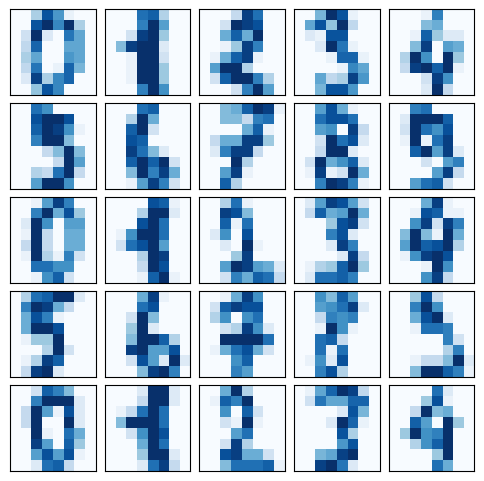

In [3]:
fig, axes = plt.subplots(5, 5, figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='Blues', interpolation='nearest')

Es decir que en estas imágenes tienen 64 dimensiones, veamos como se organizan las mismas si aplicamos PCA de 2 dimensiones. Para ello usamos la clase [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de Scikit-Learn: 

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Proyectamos de 64 a 2 dimensiones
pca.fit(digits.data)

PCA(n_components=2)

In [5]:
projected = pca.transform(digits.data)

In [6]:
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Los componentes que encontramos son:

In [7]:
print(pca.components_.shape)
print(pca.components_)

(2, 64)
[[ 0.00000000e+00 -1.73094651e-02 -2.23428835e-01 -1.35913304e-01
  -3.30323092e-02 -9.66340844e-02 -8.32943805e-03  2.26900082e-03
  -3.20516495e-04 -1.19308905e-01 -2.44451676e-01  1.48512745e-01
  -4.67319410e-02 -2.17740744e-01 -1.48136776e-02  4.47779518e-03
  -4.94136398e-05 -7.95419375e-02  8.33951454e-02  2.15915342e-01
  -1.72126801e-01 -1.63712098e-01  2.86444452e-02  4.23251803e-03
   9.85488574e-05  6.42319144e-02  2.54093316e-01 -3.56771026e-02
  -2.09462569e-01 -4.31311420e-02  5.13118688e-02  2.13422732e-04
   0.00000000e+00  1.59950883e-01  3.68690774e-01  1.64406827e-01
   8.52007908e-02  3.72982855e-02  2.15866980e-02  0.00000000e+00
   1.28865585e-03  1.06945287e-01  3.03067457e-01  2.47813041e-01
   2.09637296e-01  1.22325219e-02 -3.69458497e-02  1.61485028e-03
   6.93023548e-04 -8.35144239e-03 -5.58598986e-02  9.30534169e-02
   1.07387720e-01 -1.37734565e-01 -6.32879466e-02  9.61671077e-04
   9.55079131e-06 -1.40786840e-02 -2.35675488e-01 -1.41225588e-01
  

Vemos que son 2 de 64 elementos, además vemos dado que son vectores propios se cumple:

El producto escalar entre los dos componentes es cero:

In [8]:
np.dot(pca.components_[0], pca.components_[1])

-2.484594349406082e-16

Y el módulo de ambos es uno:

In [9]:
np.linalg.norm(pca.components_[0])

0.9999999999999999

In [10]:
np.linalg.norm(pca.components_[1])

0.9999999999999998

Además también tenemos los valores propios:

In [11]:
pca.singular_values_

array([567.0065665 , 542.25185421])

La varianza explicada de cada componente:

In [12]:
pca.explained_variance_

array([179.0069301 , 163.71774688])

Y la varianza explicada relativa:

In [13]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

También tenemos la media que es necesaria restarla al principio ya que los componentes solo tienen en cuenta la media:

In [14]:
pca.mean_

array([0.00000000e+00, 3.03839733e-01, 5.20478575e+00, 1.18358375e+01,
       1.18480801e+01, 5.78185865e+00, 1.36227045e+00, 1.29660545e-01,
       5.56483027e-03, 1.99387869e+00, 1.03823038e+01, 1.19794101e+01,
       1.02793545e+01, 8.17584864e+00, 1.84641068e+00, 1.07957707e-01,
       2.78241514e-03, 2.60155815e+00, 9.90317195e+00, 6.99276572e+00,
       7.09794101e+00, 7.80634391e+00, 1.78853645e+00, 5.00834725e-02,
       1.11296605e-03, 2.46967168e+00, 9.09126322e+00, 8.82136895e+00,
       9.92710072e+00, 7.55147468e+00, 2.31775181e+00, 2.22593211e-03,
       0.00000000e+00, 2.33945465e+00, 7.66722315e+00, 9.07178631e+00,
       1.03016138e+01, 8.74401781e+00, 2.90929327e+00, 0.00000000e+00,
       8.90372844e-03, 1.58375070e+00, 6.88146912e+00, 7.22815804e+00,
       7.67223150e+00, 8.23650529e+00, 3.45631608e+00, 2.72676683e-02,
       7.23427935e-03, 7.04507513e-01, 7.50695604e+00, 9.53923205e+00,
       9.41624930e+00, 8.75848637e+00, 3.72509738e+00, 2.06455203e-01,
      

Dado que es de dos dimensiones, podemos graficar en un gráfico de dispersión:

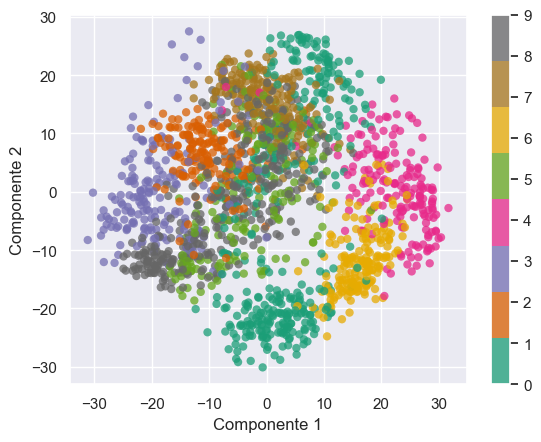

In [15]:
sns.set()

plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.75,
            cmap='Dark2')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();

Se puede considerar el PCA como un proceso de elección de funciones base óptimas, de modo que sumar solo las primeras sea suficiente para reconstruir adecuadamente la mayor parte de los elementos del conjunto de datos. 

Podemos usar 8 componentes (mas la media), dado que nos quedan representaciones del mismo tamaño de la imágen podemos visualizarlas:

In [16]:
n_components=8

pca = PCA(n_components=n_components)
Xproj = pca.fit_transform(digits.data)

mean_img = pca.mean_.reshape(8, -1)

components = pca.components_.reshape(8, 8, -1)

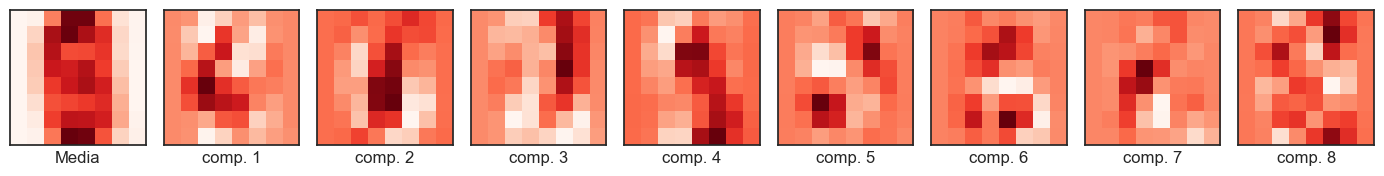

In [17]:
sns.set_style('white')
f, ax = plt.subplots(1, 9, sharey=True, figsize=(14, 14))
ax[0].imshow(mean_img, cmap='Reds', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel("Media")
for i in range(8):
    ax[i+1].imshow(components[i], cmap='Reds', interpolation='nearest')
    ax[i+1].set_xticks([])
    ax[i+1].set_yticks([])
    ax[i+1].set_xlabel(f"comp. {i+1}")
plt.tight_layout()
plt.show()

PCA permite recuperar las características destacadas (saliencia) de la imagen con solo una media más ocho componentes. La cantidad de cada píxel en cada componente es el analogo de la orientación del vector en 2-D. 

Una imágen usando 8 componentes lo podemos representar con la fórmula:

In [18]:
equation = "img_8_comp = media "  
for i in range(n_components):
    equation += f"+ {pca.singular_values_[i]:.0f} comp_{i+1} "
print(equation)

img_8_comp = media + 567 comp_1 + 542 comp_2 + 505 comp_3 + 426 comp_4 + 353 comp_5 + 326 comp_6 + 305 comp_7 + 281 comp_8 


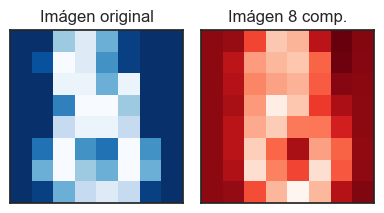

In [19]:
f, ax = plt.subplots(1, 2, figsize=(4, 4))
ax[0].imshow(digits.data[-1].reshape(8, -1), cmap='Blues_r', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Imágen original")

# Obtenemos la imagen usando 8 componentes
approx = pca.mean_.copy()
for i in range(n_components):
    approx += Xproj[-1][i] * pca.components_[i]

ax[1].imshow(approx.reshape(8, -1), cmap='Reds_r', interpolation='nearest')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Imágen 8 comp.")

plt.tight_layout()
plt.show()

## Elección del número de componentes

Una parte importante del uso de PCA es determinar cuántos componentes se necesitan para describir los datos. Esto se puede determinar observando el índice de varianza explicada acumulada en función del número de componentes:

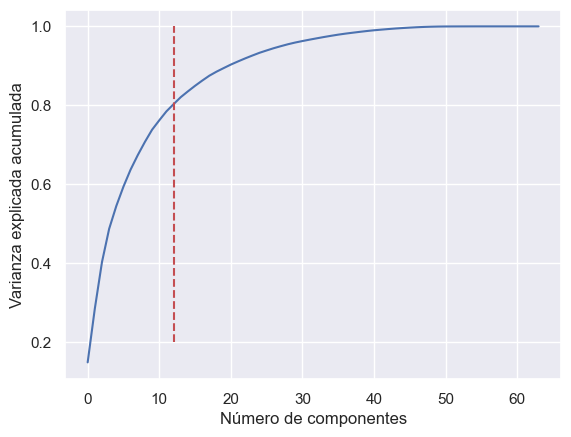

In [20]:
sns.set()
pca = PCA().fit(digits.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([12, 12], [0.2, 1.0], color="r", linestyle="--")
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada');

Esta curva cuantifíca qué parte de la varianza total de 64 dimensiones está contenida dentro de los primeros N componentes. 

Por ejemplo, se observa que con los dígitos los primeros 12 componentes contienen aproximadamente el 80% de la varianza, mientras que se necesitan alrededor de 50 componentes para describir cerca del 100% de la varianza.

## Comprimiendo imágenes

Un ejemplo muy visual de PCA es comprimir una imágen y visualizar cuanta calidad perdemos en diferentes componentes.

Para este ejemplo, vamos a usar [Scikit-Image](https://scikit-image.org/) el cual nos ofrece algoritmos de procesamiento de imágenes.

In [21]:
import skimage

In [22]:
path = './curious-bird.jpg'

image_orig = skimage.io.imread(path) # Load image

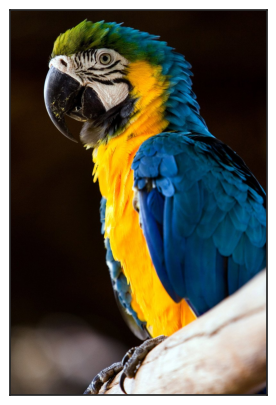

In [23]:
sns.set_style('white')

f, ax = plt.subplots(figsize=(4, 5))
ax.imshow(image_orig)
ax.set_xticks([])
ax.set_yticks([]);

Trabajar con imágenes en color posee la dificultad de que se trata de 3 canales de color. En esencia, son 3 imágenes en una, donde cada canal de color define una única imagen.

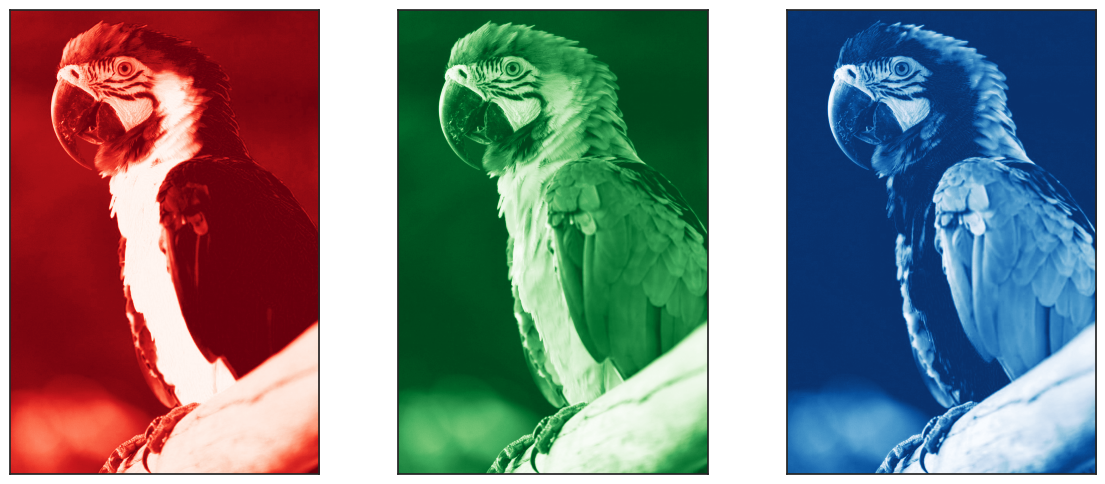

In [24]:
f, ax = plt.subplots(1,3, figsize=(4*3, 5))
ax[0].imshow(image_orig[:,:,0], cmap="Reds_r")
ax[1].imshow(image_orig[:,:,1], cmap="Greens_r")
ax[2].imshow(image_orig[:,:,2], cmap="Blues_r")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.tight_layout();

Para simplificar el problema al tratar con datos de entrada multicanal, transformamos la imagen en color en una matriz bidimensional apilando los canales de color uno encima del otro.

In [25]:
width = image_orig.shape[0]
height = image_orig.shape[1]
channels = image_orig.shape[2]

image = image_orig.reshape(width, height*channels)

In [26]:
image.shape

(1199, 2397)

Ahora comprimimos la imágen, veamos como la varianza explicada se acumula:

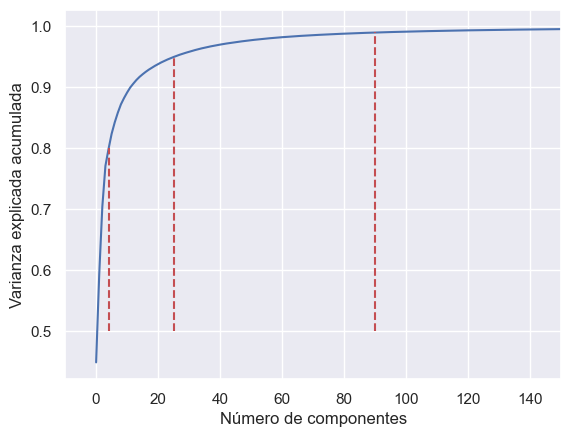

In [27]:
sns.set()
pca = PCA().fit(image.astype("float"))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([4, 4], [0.5, 0.8], color="r", linestyle="--")
plt.plot([25, 25], [0.5, 0.95], color="r", linestyle="--")
plt.plot([90, 90], [0.5, 0.99], color="r", linestyle="--")

plt.xlim([-10, 150])
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada');

Vemos que con:

- 5 componentes explicamos el 80% de la varianza.
- 26 componentes explicamos el 95% de la varianza.
- 90 componentes explicamos el 99% de la varianza.

In [28]:
def compress_image(n_components, image, size):
    pca = PCA(n_components=n_components)
    image_compressed = pca.fit_transform(image.astype("float"))
    return pca.inverse_transform(image_compressed).reshape(size).astype("uint8")

In [29]:
image_4 = compress_image(5, image, image_orig.shape)
image_26 = compress_image(26, image, image_orig.shape)
image_90 = compress_image(90, image, image_orig.shape)
image_200 = compress_image(200, image, image_orig.shape)
image_400 = compress_image(400, image, image_orig.shape)

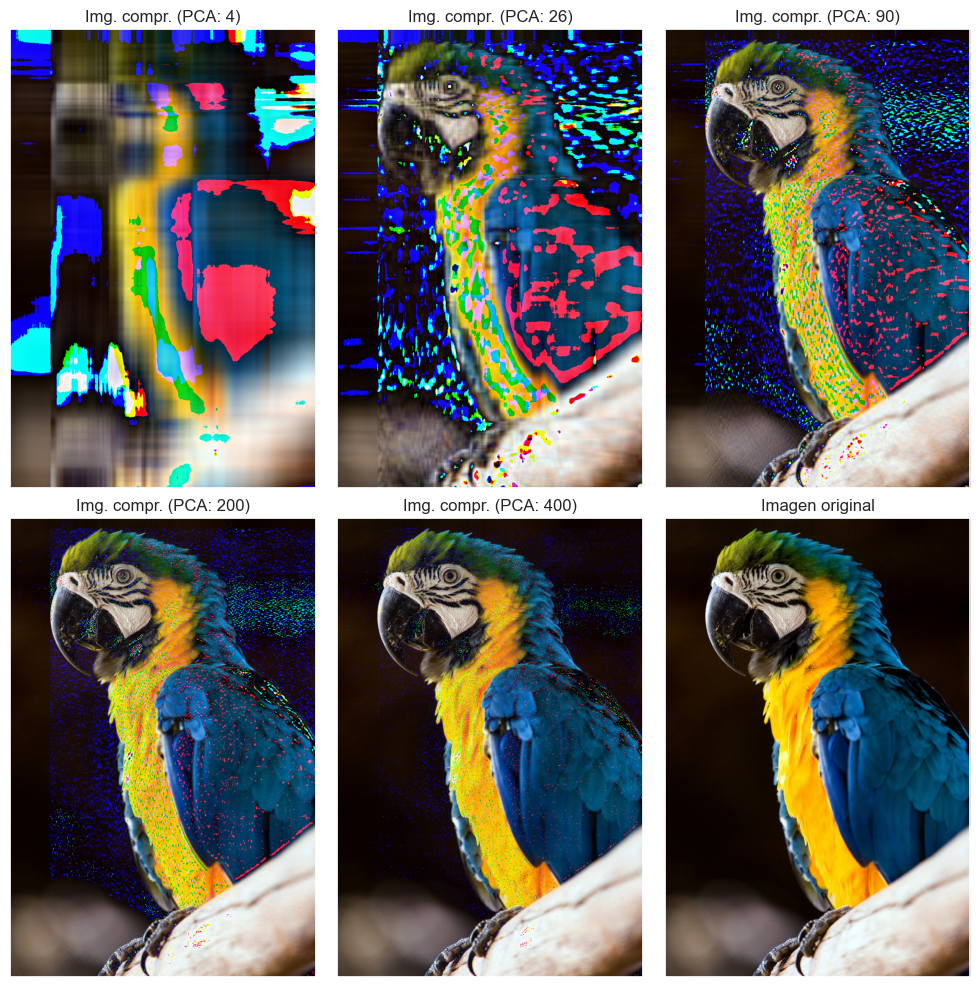

In [31]:
fig, ax = plt.subplots(2,3, figsize=(10,10))

ax[0, 0].imshow(image_4)
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 0].set_title("Img. compr. (PCA: 4)")

ax[0, 1].imshow(image_26)
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 1].set_title("Img. compr. (PCA: 26)")

ax[0, 2].imshow(image_90)
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
ax[0, 2].set_title("Img. compr. (PCA: 90)")

ax[1, 0].imshow(image_200)
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 0].set_title("Img. compr. (PCA: 200)")

ax[1, 1].imshow(image_400)
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 1].set_title("Img. compr. (PCA: 400)")

ax[1, 2].imshow(image_orig)
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
ax[1, 2].set_title("Imagen original")

plt.tight_layout();